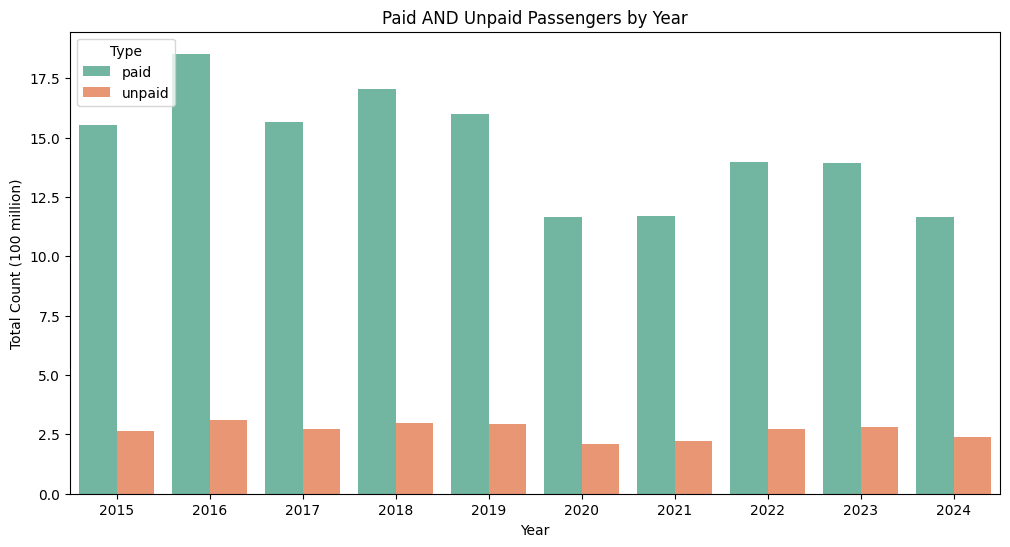

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 무임탑승 데이터용 csv 파일
df_paid_unpaid_passenger = pd.read_csv("/content/서울시 지하철 호선별 역별 유_무임 승하차 인원 정보.csv", encoding='euc-kr')

years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]  # 구하고자 하는 연도 리스트
paid_results = {}  # 유임승차 결과를 저장할 딕셔너리
unpaid_results = {} # 무임승차 결과를 저장할 딕셔너리

for year in years:
    # 사용월을 문자열로 변환 후, 해당 연도에 속하는 데이터만 필터링
    filtered_data = df_paid_unpaid_passenger[
        (df_paid_unpaid_passenger['호선명'].isin(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '9호선2~3단계'])) &
        (df_paid_unpaid_passenger['사용월'].astype(str).between(f"{year}01", f"{year}12"))
    ]

    # '유임승차인원' 합계를 계산하고 결과 딕셔너리에 저장
    paid_results[f"{year}"] = filtered_data['유임승차인원'].sum()
    # '무임승차인원' 합계를 계산하고 결과 딕셔너리에 저장
    unpaid_results[f"{year}"] = filtered_data['무임승차인원'].sum()


results_df = pd.DataFrame({
    "year": list(paid_results.keys()),
    "paid": list(paid_results.values()),
    "unpaid": list(unpaid_results.values())
})

# 유임승차인원과 무임승차인원의 값을 억 단위로 변환
results_df['paid'] = results_df['paid'] / 100000000  # 억 단위로 변환
results_df['unpaid'] = results_df['unpaid'] / 100000000  # 억 단위로 변환


# 'year'을 기준으로 melt하여 긴 형태로 변환 (countplot에서 사용하기 위해)
melted_df = results_df.melt(id_vars='year', value_vars=['paid', 'unpaid'], var_name='Type', value_name='Count')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='year', y='Count', hue='Type', palette='Set2')

plt.title('Paid AND Unpaid Passengers by Year')
plt.xlabel('Year')
plt.ylabel('Total Count (100 million)') # 1억단위
plt.legend(title='Type', loc='upper left')
plt.show()

#---------------------------------------------------------------------------------------

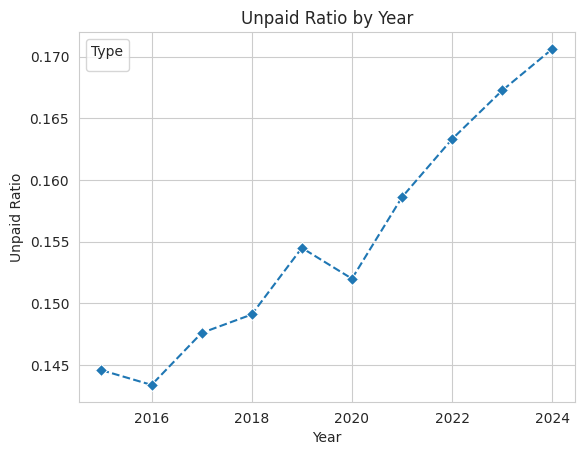

In [2]:
# 유 무임 승차 비율 코드

# 무임승차 비율 저장 변수
unpaid_ratio = []

# 무임승차 비율 계산
for i in years:
  unpaid_ratio.append(unpaid_results[str(i)]/(unpaid_results[str(i)]+paid_results[str(i)]))

# 비율 데이터프레임으로 변환
ratio_df = pd.DataFrame({
    'year': years,
    'unpaid_ratio': unpaid_ratio
})

# 시각화
sns.set_style('whitegrid')
sns.lineplot(data=ratio_df,x='year',y='unpaid_ratio', marker = 'D', linestyle = '--')


plt.title('Unpaid Ratio by Year')
plt.xlabel('Year')
plt.ylabel('Unpaid Ratio')
plt.legend(title='Type', loc='upper left')
plt.show()

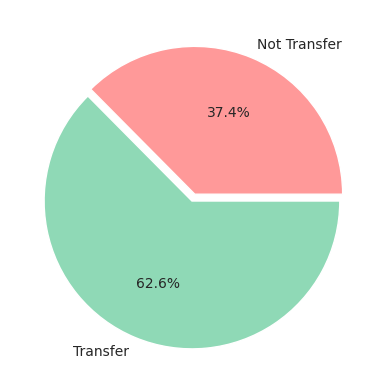

In [3]:
#-----------------------------------------------------------------
#환승 비율 시각화 코드

# 환승 데이터용 csv 파일
df_transfer_passenger = pd.read_csv('/content/서울교통공사_월별 환승유입인원_20231231.csv', encoding='euc-kr')

transfer_passenger = df_transfer_passenger['환승유입인원수'].sum()


# 데이터 설정
ratio = [transfer_passenger, paid_results["2023"]]
labels = ['Not Transfer', 'Transfer']
explode = [0, 0.05] # 중심에서 벗어나는 정도 설정
colors = ['#ff9999', '#8fd9b6']

# 파이 차트 생성
plt.pie(ratio, labels=labels, autopct='%.1f%%',explode=explode, colors = colors)
plt.show()


In [4]:

#---------------------------------------------------------------------
# 조조할인과 일반 탑승 비율
df_station_daily_passenger = pd.read_csv("/content/서울교통공사_일별통행통계_20240616.csv", encoding='euc-kr')

regular_card_morning_discount = {} # 조조탑승이면서 어린이, 청소년, 일반
single_use_card_morning_discount = {} # 조조탑승이면서 1회용 어린이, 일반
single_use_card = {} # 일반 및 1회용 탑승이면서 어린이, 청소년, 일반
regular_card = {} # 일반 탑승이면서 어린이, 청소년, 일반

# 수송일자를 날짜 형식으로 변환
df_station_daily_passenger['수송일자'] = pd.to_datetime(df_station_daily_passenger['수송일자'])

# 2024-05-31까지만 데이터 필터링
df_station_daily_passenger = df_station_daily_passenger[df_station_daily_passenger['수송일자'] <= '2024-05-31']

# 조조할인 시간
morning_discount_time = ['04시','05시','06시']

# 조조할인 불가능 시간
time = ['07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시',
        '19시', '20시', '21시', '22시', '23시', '00시', '01시', '02시', '03시']


# 일반 탑승객 ( 어린이, 청소년, 일반, 중고생, 우대권)
for passenger in ['일반','어린이','중고생','청소년', '우대권']:
    # 해당 승객 유형에 맞는 데이터를 필터링
    temp_df = df_station_daily_passenger[(df_station_daily_passenger['승객유형'] == passenger)
                                    & (df_station_daily_passenger['권종'].isin(['선불카드','후불카드']))]

    regular_card[passenger] = temp_df[time].sum().sum()  # 전체 합계 계산
    regular_card_morning_discount[passenger] = temp_df[morning_discount_time].sum().sum()



# 1회용 교통카드 이용 탑승객 (어린이, 일반, 외국인, 우대권)
for passenger in ['일반','어린이','외국인', '우대권']:
    # 해당 승객 유형에 맞는 데이터를 필터링
    temp_df = df_station_daily_passenger[(df_station_daily_passenger['승객유형'] == passenger)
                                    & (df_station_daily_passenger['권종'].isin(['1회용교통카드']))]

    single_use_card[passenger] = temp_df[time].sum().sum()  # 전체 합계 계산
    single_use_card_morning_discount[passenger] = temp_df[morning_discount_time].sum().sum()  # 조조할인 합계


filtered_data = df_paid_unpaid_passenger[
    (df_paid_unpaid_passenger['호선명'].isin(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선','9호선2~3단계'])) &
    (df_paid_unpaid_passenger['사용월'].astype(str).between(f"202401", f"202405"))
]

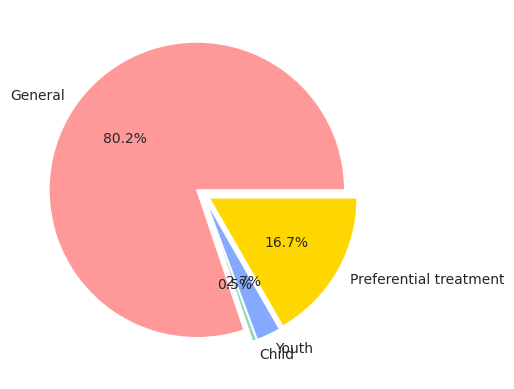

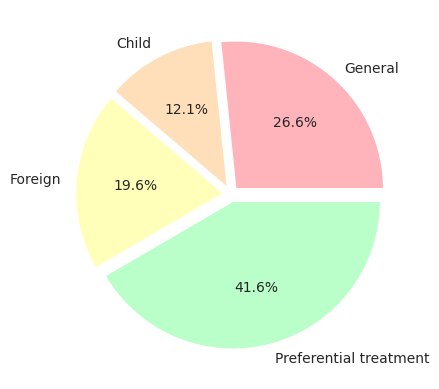

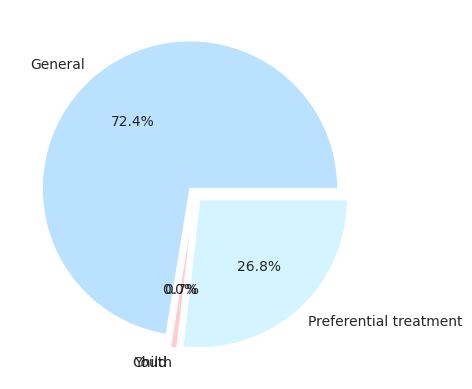

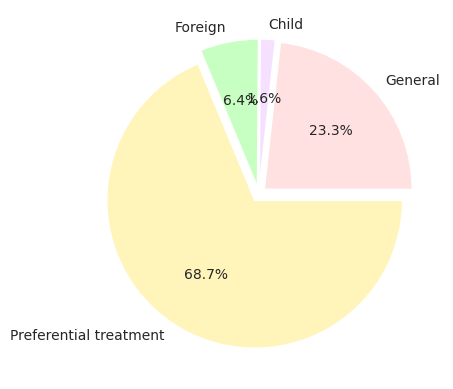

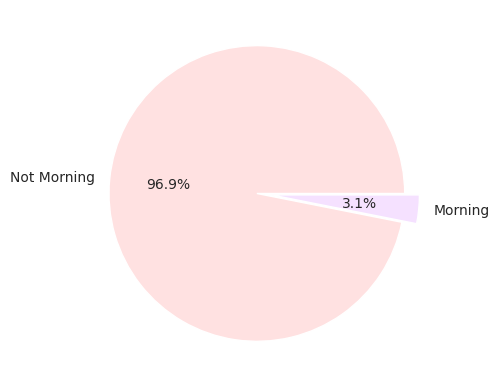

In [5]:

# 일반 시간 및 일반권 탑승 고객

ratio = [regular_card['일반'],regular_card['어린이'],regular_card['중고생']+regular_card['청소년'],regular_card['우대권']]
labels = ['General', 'Child', 'Youth', 'Preferential treatment']
explode = [0.05, 0.05, 0.05, 0.05] # 중심에서 벗어나는 정도 설정
colors = ['#ff9999', '#8fd9b6', '#83aaff', '#ffd700']

# 파이 차트 생성
plt.pie(ratio, labels=labels, autopct='%.1f%%',explode=explode, colors = colors)
plt.show()

# 일반 시간 및 1회권 탑승 고객

ratio = [single_use_card['일반'],single_use_card['어린이'],single_use_card['외국인'],single_use_card['우대권']]
labels = ['General', 'Child', 'Foreign', 'Preferential treatment']
explode = [0.05, 0.05, 0.05, 0.05] # 중심에서 벗어나는 정도 설정
colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9']

# 파이 차트 생성
plt.pie(ratio, labels=labels, autopct='%.1f%%',explode=explode, colors = colors)
plt.show()

# 조조 시간 및 일반권 탑승 고객

ratio = [regular_card_morning_discount['일반'],regular_card_morning_discount['어린이']
         ,regular_card_morning_discount['중고생']+regular_card_morning_discount['청소년'], regular_card_morning_discount['우대권']]
labels = ['General', 'Child', 'Youth', 'Preferential treatment']
explode = [0.05, 0.05, 0.05, 0.05] # 중심에서 벗어나는 정도 설정
colors = ['#BAE1FF', '#E2BAFF', '#FFCCD2', '#D4F4FF']

# 파이 차트 생성
plt.pie(ratio, labels=labels, autopct='%.1f%%',explode=explode, colors = colors)
plt.show()

# 조조 시간 및 1회권 탑승 고객

ratio = [single_use_card_morning_discount['일반'],single_use_card_morning_discount['어린이'],
         single_use_card_morning_discount['외국인'],single_use_card_morning_discount['우대권']]
labels = ['General', 'Child', 'Foreign', 'Preferential treatment']
explode = [0.05, 0.05, 0.05, 0.05] # 중심에서 벗어나는 정도 설정
colors = ['#FFE1E1', '#F5E1FF', '#C6FFC1', '#FFF5BA']



# 조조할인과 일반탑승의 비율 차트
plt.pie(ratio, labels=labels, autopct='%.1f%%',explode=explode, colors = colors)
plt.show()

ratio = [sum(regular_card.values())+sum(single_use_card.values()),
         sum(regular_card_morning_discount.values())+sum(single_use_card_morning_discount.values())]
labels = ['Not Morning','Morning']
explode = [0.05, 0.05] # 중심에서 벗어나는 정도 설정
colors = ['#FFE1E1', '#F5E1FF']

# 파이 차트 생성
plt.pie(ratio, labels=labels, autopct='%.1f%%',explode=explode, colors = colors)
plt.show()